In this project, we are going to analyze and predict the sales during Black Friday, and display the results through plot graphs and different prediction models.

## Dataset Information

This dataset comprises of sales transactions captured at a retail store. It’s a classic dataset to explore and expand your feature engineering skills and day to day understanding from multiple shopping experiences. This is a regression problem. The dataset has 550,069 rows and 12 columns.

<b>Problem</b> : Predict purchase amount

## Attributes

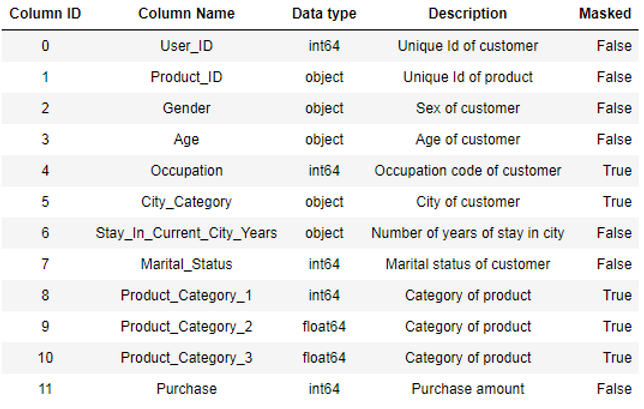

* Masked attributes hide the data information

## Import Modules

* <b>pandas</b> - used to perform data manipulation and analysis


* <b>numpy</b> - used to perform a wide variety of mathematical operations on arrays


* <b>matplotlib</b> - used for data visualization and graphical plotting


* <b>seaborn</b> - built on top of matplotlib with similar functionalities


* <b>%matplotlib</b> - to enable the inline plotting


* <b>warnings</b> - to manipulate warnings details


<b> filterwarnings('ignore')</b> is to ignore the warnings thrown by the modules (gives clean results)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline

warnings.filterwarnings('ignore')

## Loading the Dataset

In [2]:
df = pd.read_csv('train.csv')
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


* Some columns have null values, those values must be replaced for a relevant value for further processing

Let us see the statistical information of the attributes.

In [3]:
# statistical info
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


* Statistical information of the data


* <b>Product_Category_2</b> and <b>Product_Category_3</b> have lower number of samples than <b>Product_Category_1</b>, both could be sub categories

Let us see the data type information of the attributes.

In [4]:
# datatype info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


* We have categorical as well as numerical attributes which we will process separately


* <b>Product_Category_1</b> data type is different from <b>Product_Category_2</b> and <b>Product_Category_3</b>, that won't affect the process or the result

In [5]:
# find unique values
df.apply(lambda x: len(x.unique()))

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Product_Category_2               18
Product_Category_3               16
Purchase                      18105
dtype: int64

* Attributes containing many unique values are of numerical type. The remaining attributes are of categorical type

Now we can directly go to the exploratory data analysis.

## Exploratory Data Analysis

<AxesSubplot:xlabel='Purchase', ylabel='Density'>

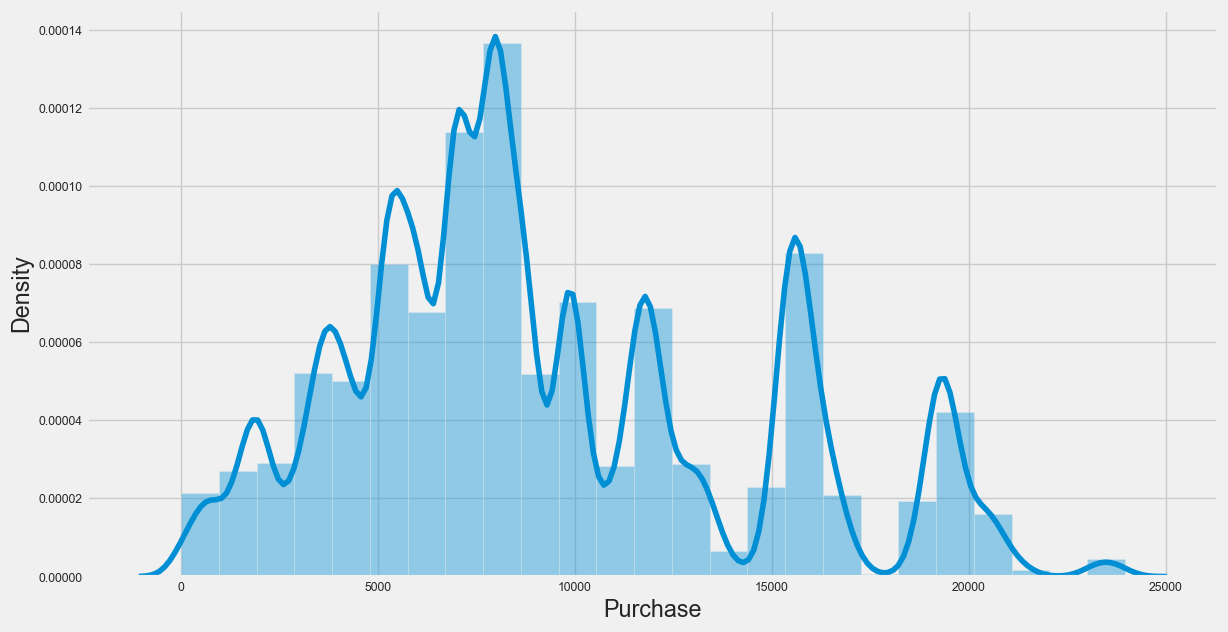

In [6]:
sns.set(font_scale=0.8)
# distplot for purchase
plt.style.use('fivethirtyeight')
plt.figure(figsize=(13, 7))
sns.distplot(df['Purchase'], bins=25)

* First part of the graph has a normal distribution and later forming some peaks in the graph


* Evaluating the whole graph, it has a normal distribution

<AxesSubplot:xlabel='Gender', ylabel='count'>

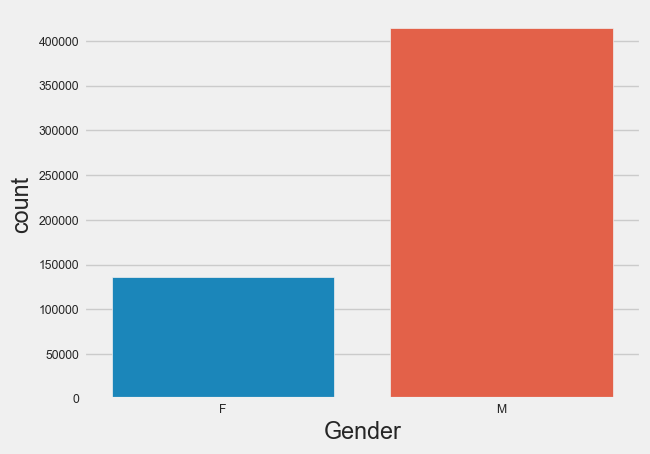

In [7]:
# distribution of numeric variables
sns.countplot(df['Gender'])

* Many buyers are male while the minority are female


* Difference is due to the categories on sale during Black Friday, evaluating a particular category may change the count between genders

<AxesSubplot:xlabel='Age', ylabel='count'>

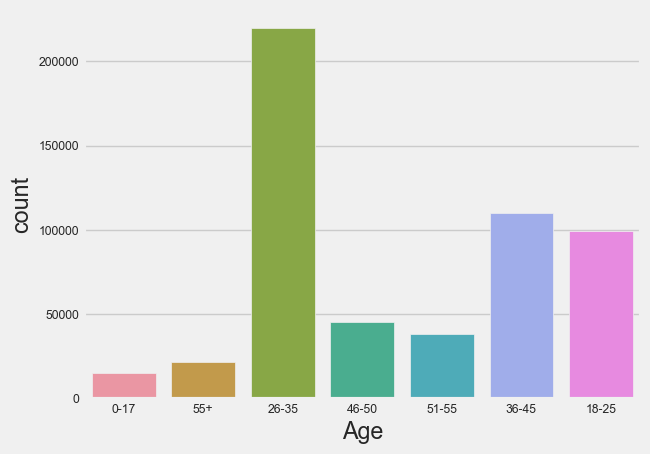

In [8]:
sns.countplot(df['Age'])

* There are 7 categories defined to classify the age of the buyers

<AxesSubplot:xlabel='Marital_Status', ylabel='count'>

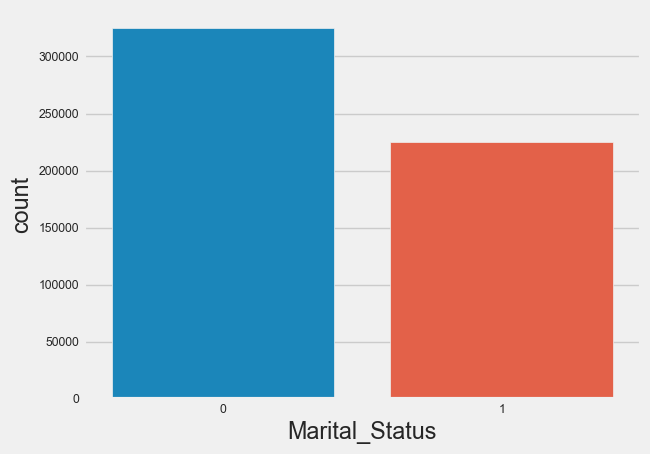

In [9]:
sns.countplot(df['Marital_Status'])

* Majority of the buyers are single

<AxesSubplot:xlabel='Occupation', ylabel='count'>

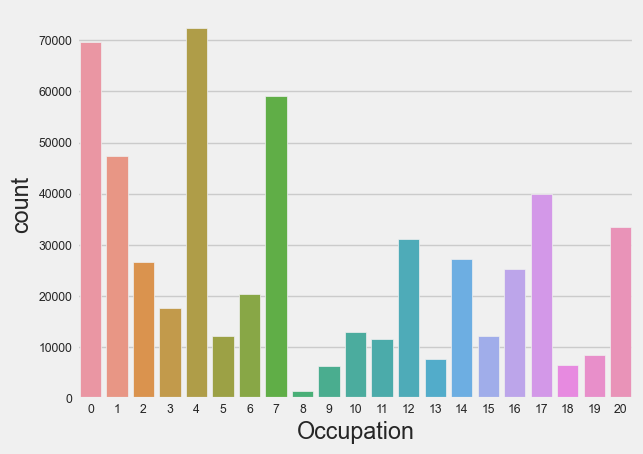

In [10]:
sns.countplot(df['Occupation'])

* Display of the occupation of the buyers


* Occupation 8 has extremely low count compared with the others. It can be ignored for the calculation since it won't affect much the result

<AxesSubplot:xlabel='Product_Category_1', ylabel='count'>

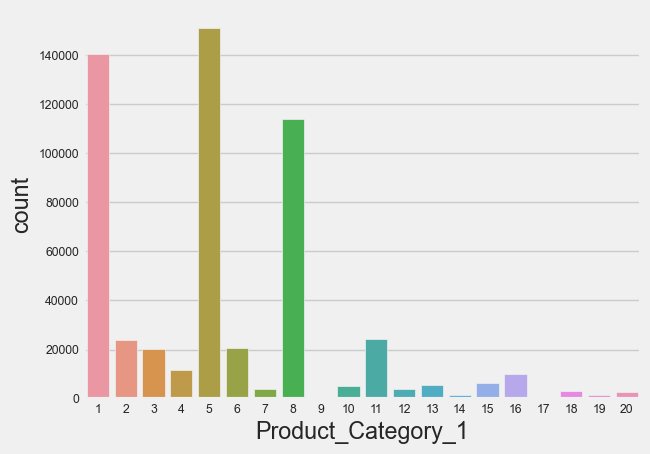

In [11]:
sns.countplot(df['Product_Category_1'])

* Majority of the products are in category 1, 5 and 8


* The low number categories can be combined into a single category to greatly reduce the complexity of the problem

<AxesSubplot:xlabel='Product_Category_2', ylabel='count'>

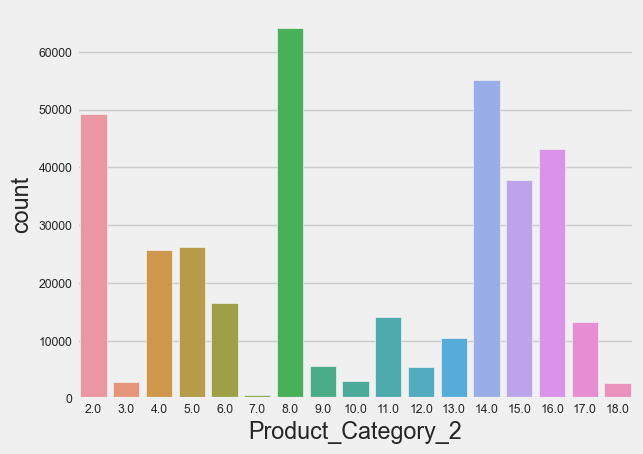

In [12]:
sns.countplot(df['Product_Category_2'])

* Categories are in float values


* Categories 2, 8, 14 to 16 are higher compared with the others

<AxesSubplot:xlabel='Product_Category_3', ylabel='count'>

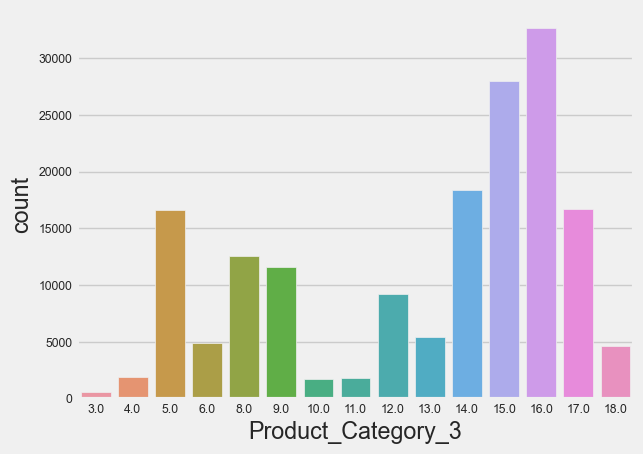

In [13]:
sns.countplot(df['Product_Category_3'])

* Categories are in float values

* Categories 14 to 17 are higher

<AxesSubplot:xlabel='City_Category', ylabel='count'>

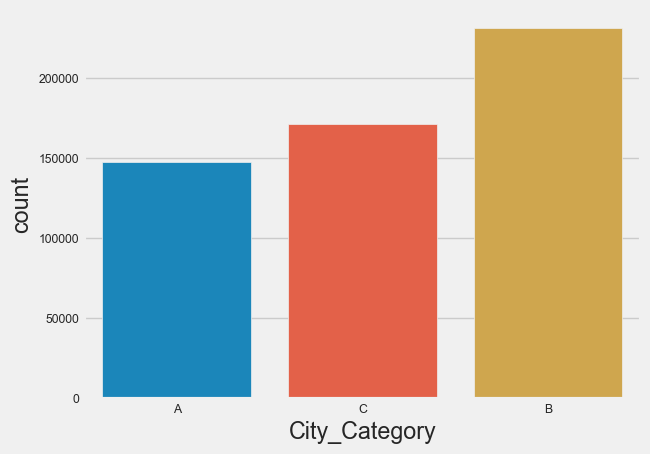

In [14]:
sns.countplot(df['City_Category'])

* Higher count might represent the urban area indicates more population

<AxesSubplot:xlabel='Stay_In_Current_City_Years', ylabel='count'>

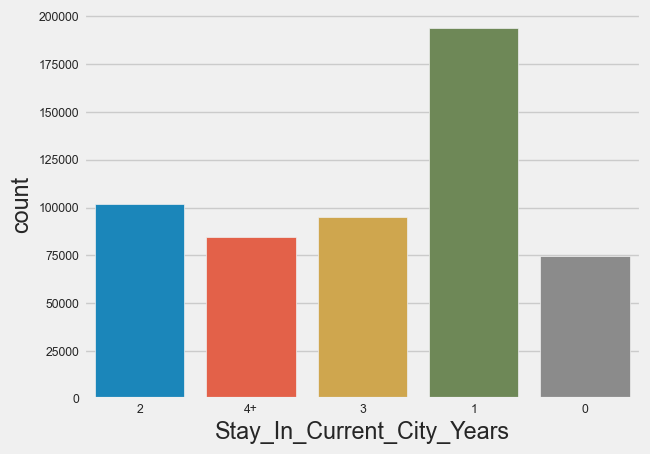

In [15]:
sns.countplot(df['Stay_In_Current_City_Years'])

* Most buyers have one year living in the city


* Remaining categories are uniform distribution

Now let us plot using two variables for analysis.

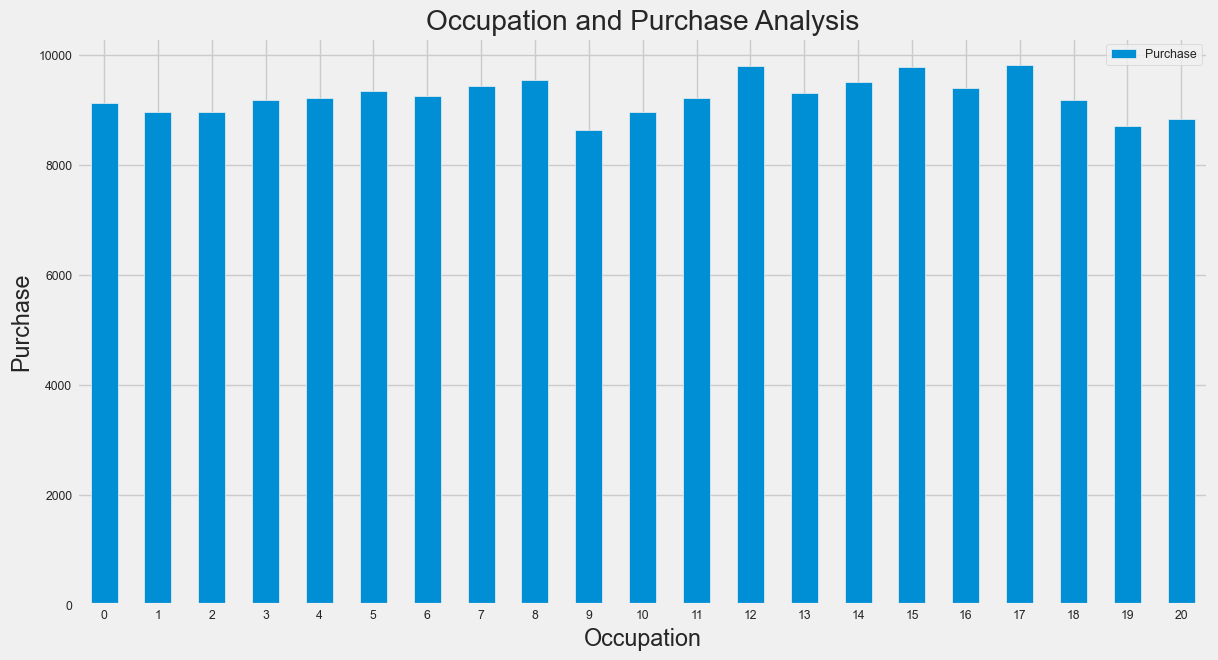

In [16]:
# bivariate analysis
occupation_plot = df.pivot_table(index='Occupation', values='Purchase', aggfunc=np.mean)
occupation_plot.plot(kind='bar', figsize=(13, 7))
plt.xlabel('Occupation')
plt.ylabel("Purchase")
plt.title("Occupation and Purchase Analysis")
plt.xticks(rotation=0)
plt.show()

* <b>np.mean</b> will display mean of the purchase based on occupation


* <b>np.sum</b> will display a sum of the purchase based on occupation


* Based on the labels, we can observe all the categories being purchased in an average manner


* Recommended plot graph for presentation

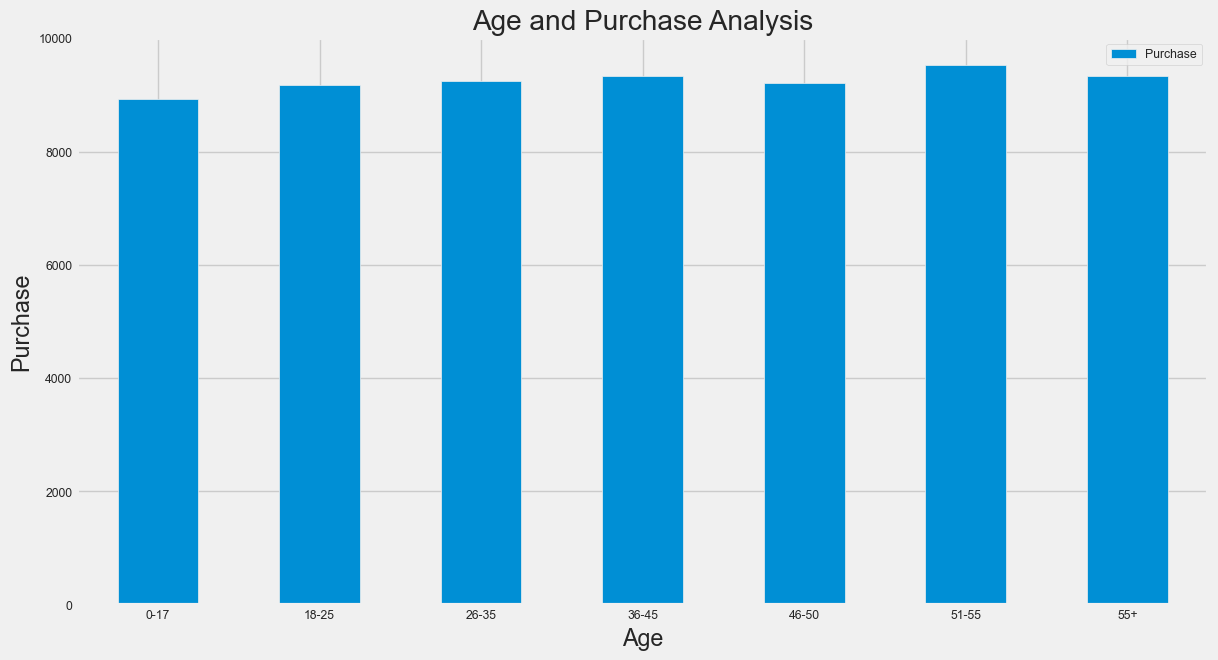

In [17]:
age_plot = df.pivot_table(index='Age', values='Purchase', aggfunc=np.mean)
age_plot.plot(kind='bar', figsize=(13, 7))
plt.xlabel('Age')
plt.ylabel("Purchase")
plt.title("Age and Purchase Analysis")
plt.xticks(rotation=0)
plt.show()

* Age and Purchase graph also has a uniform distribution


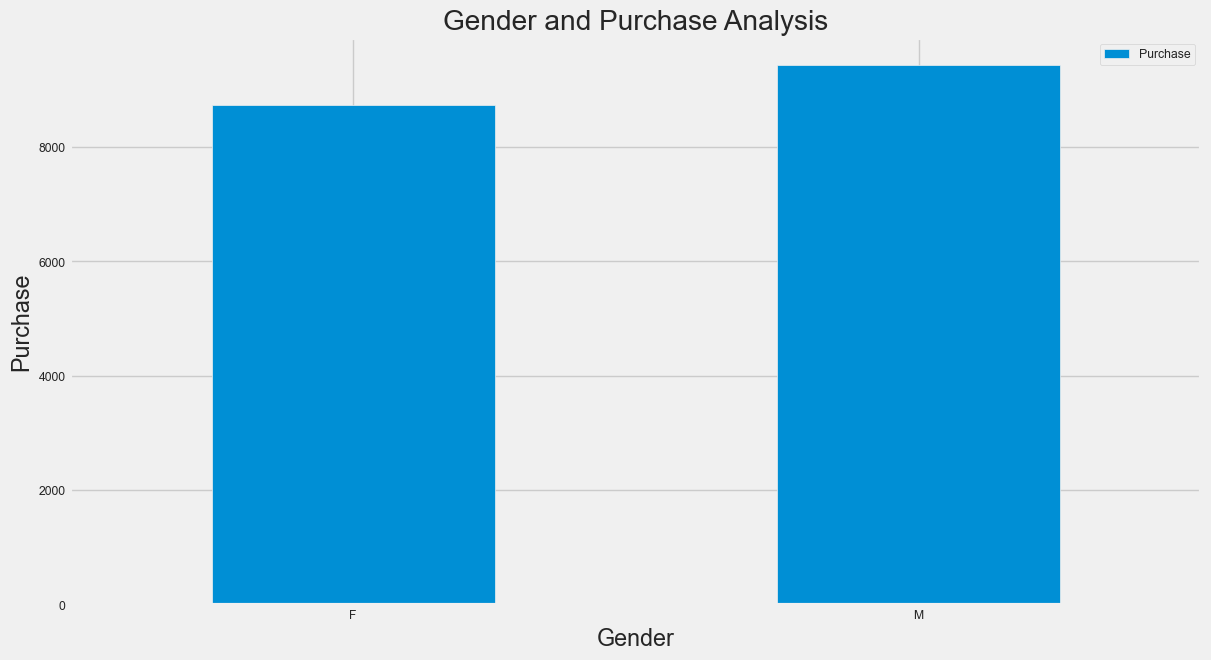

In [18]:
gender_plot = df.pivot_table(index='Gender', values='Purchase', aggfunc=np.mean)
gender_plot.plot(kind='bar', figsize=(13, 7))
plt.xlabel('Gender')
plt.ylabel("Purchase")
plt.title("Gender and Purchase Analysis")
plt.xticks(rotation=0)
plt.show()

* Uniform distribution but with a little difference

## Preprocessing the Dataset

We must check first for null values in the data.

In [19]:
# check for null values
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

* Null values are present in <b>Product_Category_2</b> and <b>Product_Category_3</b>


* Null values must be filled for easier processing

Now we fill the Null values in the dataset.

In [20]:
df['Product_Category_2'] = df['Product_Category_2'].fillna(-2.0).astype("float32")
df['Product_Category_3'] = df['Product_Category_3'].fillna(-2.0).astype("float32")

* Null values filled with a negative value to not affect the results


* The value filled must be of same data type of the attribute

Let us double check the null values.

In [21]:
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

Now we must convert the categorical attributes to numerical using a dictionary.

In [22]:
# encoding values using dict
gender_dict = {'F':0, 'M':1}
df['Gender'] = df['Gender'].apply(lambda x: gender_dict[x])
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0-17,10,A,2,0,3,-2.0,-2.0,8370
1,1000001,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,0,0-17,10,A,2,0,12,-2.0,-2.0,1422
3,1000001,P00085442,0,0-17,10,A,2,0,12,14.0,-2.0,1057
4,1000002,P00285442,1,55+,16,C,4+,0,8,-2.0,-2.0,7969


* <b>F</b> now converted to numerical zero (0), same for <b>M</b> to one (1)

Label encoding is to convert the categorical column into the numerical column a lot quicker. To improve the metric use one hot encoding.

In [23]:
# label encoding
cols = ['Age', 'City_Category', 'Stay_In_Current_City_Years']
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in cols:
    df[col] = le.fit_transform(df[col])
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0,10,0,2,0,3,-2.0,-2.0,8370
1,1000001,P00248942,0,0,10,0,2,0,1,6.0,14.0,15200
2,1000001,P00087842,0,0,10,0,2,0,12,-2.0,-2.0,1422
3,1000001,P00085442,0,0,10,0,2,0,12,14.0,-2.0,1057
4,1000002,P00285442,1,6,16,2,4,0,8,-2.0,-2.0,7969


* One hot encoding increases the no. of columns but improves accuracy


* More columns means more data to train, it will increase the training time


* All categorical columns converted to numerical


* For the input <b>User_ID</b> and <b>Product_ID</b> must be removed in order to generalize the results


## Correlation Matrix

A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. The value is in the range of -1 to 1. If two variables have a high correlation, we can neglect one variable from those two.

<AxesSubplot:>

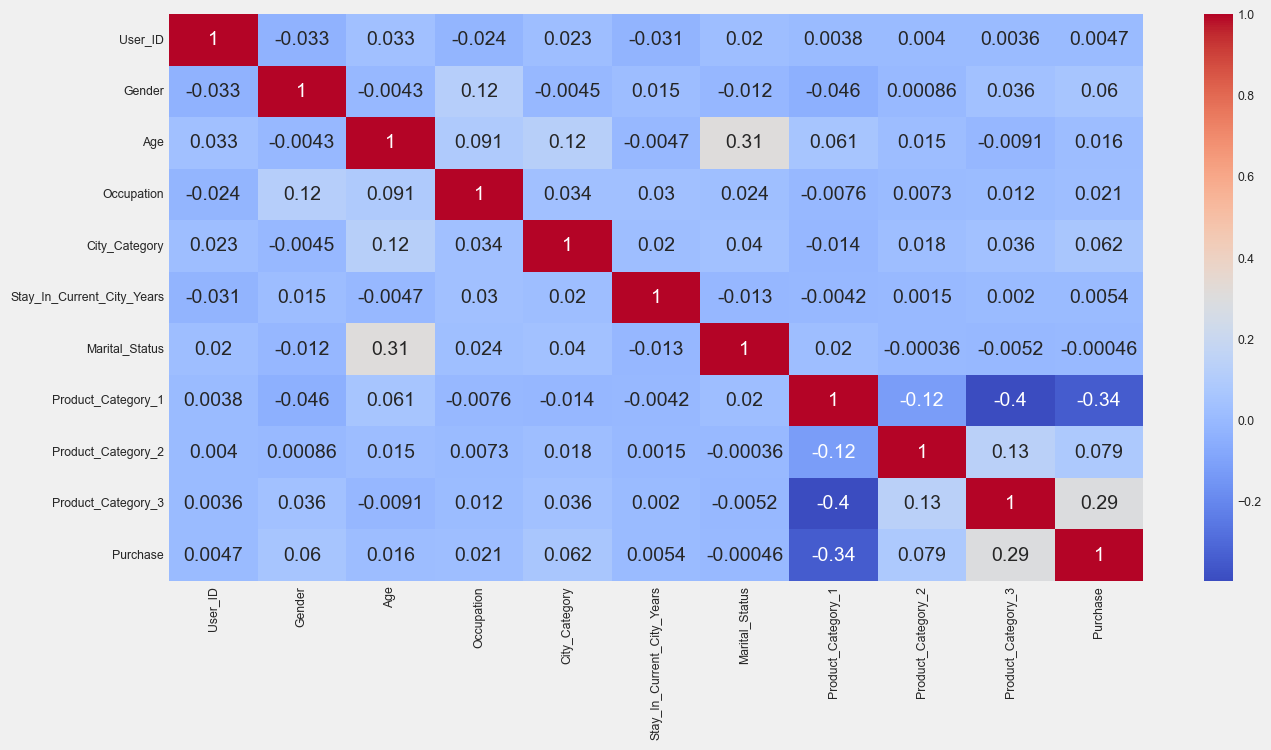

In [24]:
corr = df.corr()
plt.figure(figsize=(14,7))
sns.heatmap(corr, annot=True, cmap='coolwarm')

* Purchase is most correlated to <b>Product_Category_1</b> and <b>Product_Category_3</b>


* <b>Marital_Status</b> and <b>Ag</b>e also has positive correlation

## Input Split

In [25]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0,10,0,2,0,3,-2.0,-2.0,8370
1,1000001,P00248942,0,0,10,0,2,0,1,6.0,14.0,15200
2,1000001,P00087842,0,0,10,0,2,0,12,-2.0,-2.0,1422
3,1000001,P00085442,0,0,10,0,2,0,12,14.0,-2.0,1057
4,1000002,P00285442,1,6,16,2,4,0,8,-2.0,-2.0,7969


* <b>User_ID</b> and <b>Product_ID</b> must be removed for better results, if not the results will be biased to <b>User_ID</b> or <b>Product_ID</b> 

Now we split the data for training.

In [26]:
X = df.drop(columns=['User_ID', 'Product_ID', 'Purchase'])
y = df['Purchase']

* Purchase is an output data that is why it is removed from <b>X</b> as well

## Model Training and Analysis

In [27]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
def train(model, X, y):
    
    # train-test split
    x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.25)
    model.fit(x_train, y_train)
    
    # predict the results
    pred = model.predict(x_test)
    
    # cross validation
    cv_score = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5)
    cv_score = np.abs(np.mean(cv_score))
    
    print("Results")
    print("MSE:", np.sqrt(mean_squared_error(y_test, pred)))
    print("CV Score:", np.sqrt(cv_score))

* <b>cross val score()</b> is used for better validation of the model


* <b>cv=5</b> means that the cross-validation will split the data into 5 parts for training


* <b>np.abs()</b> will convert the negative score to positive and np.mean() will give the average value of 5 scores

Now we display the basic models.

#### Linear Regression

Results
MSE: 4617.994034201719
CV Score: 4625.252945835687


<AxesSubplot:title={'center':'Model Coefficients'}>

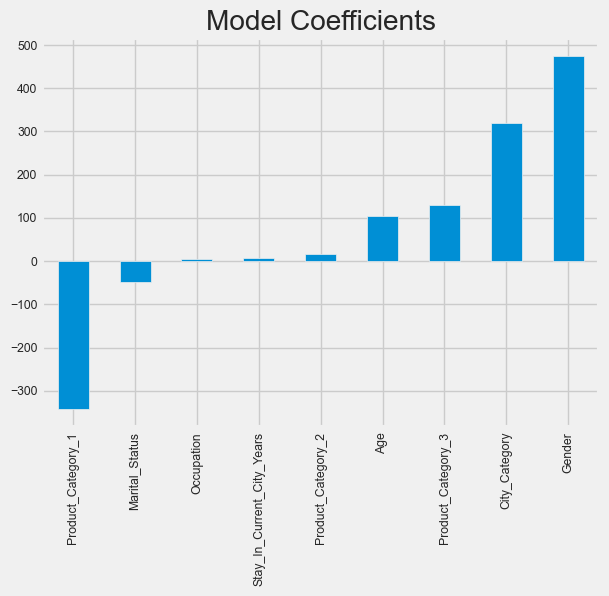

In [28]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(normalize=True)
train(model, X, y)
coef = pd.Series(model.coef_, X.columns).sort_values()
coef.plot(kind='bar', title='Model Coefficients')

* <b>Linear Regression</b> model must have normalized data to give better results


* <b>Gender</b> category has high coefficient for the Linear Regression model

#### Decision Tree

Results
MSE: 3364.1763980101978
CV Score: 3339.848393938476


<AxesSubplot:title={'center':'Feature Importance'}>

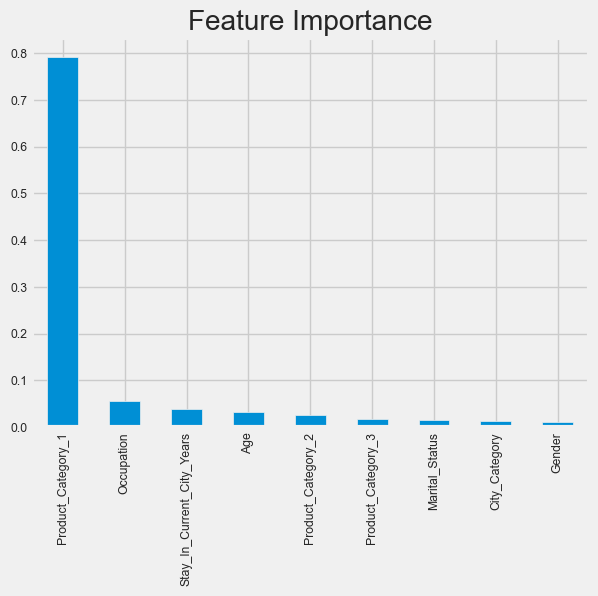

In [29]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
train(model, X, y)
features = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
features.plot(kind='bar', title='Feature Importance')

* Results have improved compared to <b>Linear Regression model</b>


* <b>Product_Category_1</b> has high feature importance compared to the Linear Regression model

#### Random Forest

Results
MSE: 3063.4121910424465
CV Score: 3052.1574683962476


<AxesSubplot:title={'center':'Feature Importance'}>

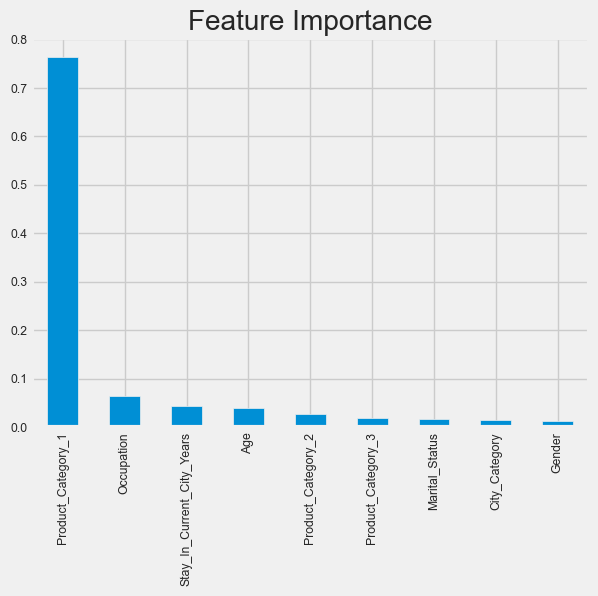

In [30]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_jobs=-1)
train(model, X, y)
features = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
features.plot(kind='bar', title='Feature Importance')

* Better results compared with <b>Decision Tree Regressor</b>

#### Extra Trees

Results
MSE: 3194.9423297504823
CV Score: 3179.8520633672556


<AxesSubplot:title={'center':'Feature Importance'}>

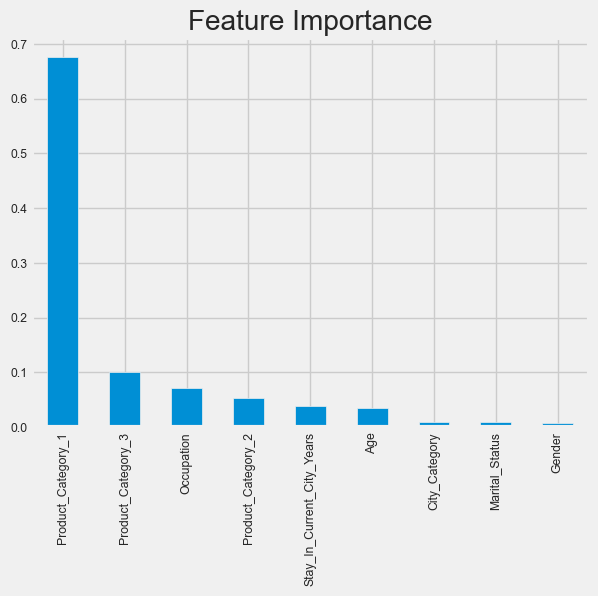

In [31]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor(n_jobs=-1)
train(model, X, y)
features = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
features.plot(kind='bar', title='Feature Importance')

* Better results than <b>Linear Regression</b> but less than <b>Random Forest Regression</b>

## Final Thoughts

* Out of the 4 models, <b>Random Forest Regressor</b> is the top performer with the least <b>MSE</b> and <b>CV</b> score


* You can also use hyperparameter tuning to improve the model performance


* You can further try other models like XGBoost, CatBoost